<a href="https://colab.research.google.com/github/Amritkandel49/person-based-video-segmentation-using-osnet/blob/main/yolo_finetune_with_combined_dataset_without_freeze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/Colab\ Notebooks/yolo/Finetune\ datasets/N-INRIA.v7-inria-n_224.yolov8.zip /content/
!cp /content/drive/MyDrive/Colab\ Notebooks/yolo/Finetune\ datasets/PersonNormal.v1i.yolov8.zip /content/

In [ ]:
import shutil

shutil.unpack_archive('N-INRIA.v7-inria-n_224.yolov8.zip', '/content/N-INRIA.v7-inria-n_224.yolov8/')
shutil.unpack_archive('PersonNormal.v1i.yolov8.zip', '/content/PersonNormal.v1i.yolov8/')

In [ ]:
!mkdir -p pedestrian_combined/train/images
!mkdir -p pedestrian_combined/train/labels
!mkdir -p pedestrian_combined/valid/images
!mkdir -p pedestrian_combined/valid/labels

In [ ]:
!cp N-INRIA.v7-inria-n_224.yolov8/train/images/* pedestrian_combined/train/images/
!cp N-INRIA.v7-inria-n_224.yolov8/train/labels/* pedestrian_combined/train/labels/

!cp N-INRIA.v7-inria-n_224.yolov8/valid/images/* pedestrian_combined/valid/images/
!cp N-INRIA.v7-inria-n_224.yolov8/valid/labels/* pedestrian_combined/valid/labels/

In [ ]:
!for f in PersonNormal.v1i.yolov8/train/images/*; do mv "$f" "PersonNormal.v1i.yolov8/train/images/B_$(basename $f)"; done

!for f in PersonNormal.v1i.yolov8/train/labels/*; do mv "$f" "PersonNormal.v1i.yolov8/train/labels/B_$(basename $f)"; done

In [ ]:
!for f in PersonNormal.v1i.yolov8/valid/images/*; do mv "$f" "PersonNormal.v1i.yolov8/valid/images/B_$(basename $f)"; done

!for f in PersonNormal.v1i.yolov8/valid/labels/*; do mv "$f" "PersonNormal.v1i.yolov8/valid/labels/B_$(basename $f)"; done


In [ ]:
!cp PersonNormal.v1i.yolov8/train/labels/* pedestrian_combined/train/labels/
!cp PersonNormal.v1i.yolov8/train/images/* pedestrian_combined/train/images/

!cp PersonNormal.v1i.yolov8/valid/images/* pedestrian_combined/valid/images/
!cp PersonNormal.v1i.yolov8/valid/labels/* pedestrian_combined/valid/labels/


In [ ]:
%%bash
cat <<EOF > pedestrian_combined/data.yaml
path: pedestrian_combined

train: train/images
val: valid/images

nc: 1
names: ["person"]
EOF

In [ ]:
!cat pedestrian_combined/data.yaml

path: pedestrian_combined

train: train/images
val: valid/images

nc: 1
names: ["person"]


In [ ]:
!ls pedestrian_combined/train/images | wc -l
!ls pedestrian_combined/train/labels | wc -l

1336
1336


In [ ]:
!ls pedestrian_combined/valid/images | wc -l
!ls pedestrian_combined/valid/labels | wc -l

133
133


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 38.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8m.pt")

model.train(
    data="pedestrian_combined/data.yaml",
    epochs=100,
    imgsz=640,
    batch=32,
    lr0=0.002,
    optimizer="AdamW",
    single_cls=True,
    # freeze=10,
    close_mosaic=20,
    device=0,
    patience = 20
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.237 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=20, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=pedestrian_combined/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=Fa

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b66cc18e3f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

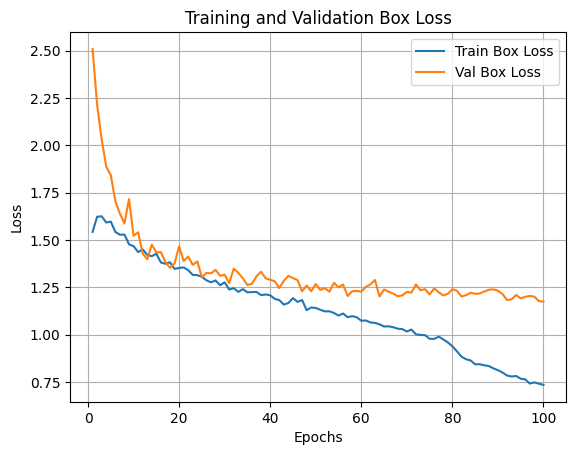

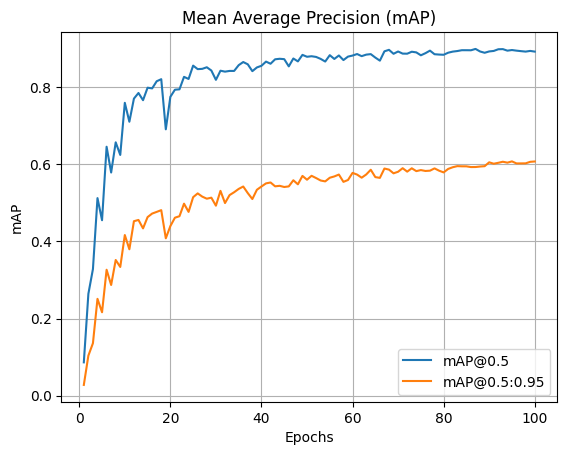

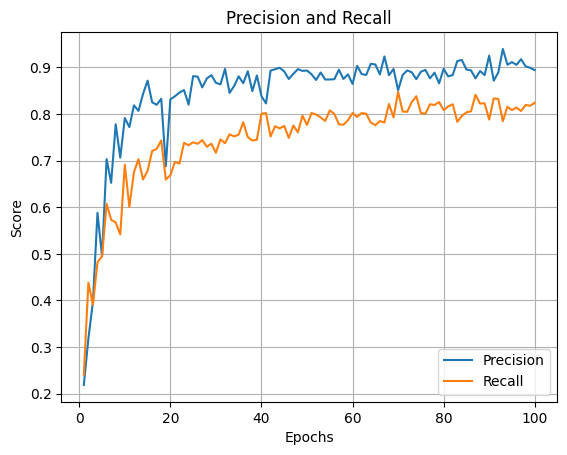

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/runs/detect/train/results.csv")
epochs = df["epoch"]

# ---- BOX LOSS ----
plt.figure()
plt.plot(epochs, df["train/box_loss"], label="Train Box Loss")
plt.plot(epochs, df["val/box_loss"], label="Val Box Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Box Loss")
plt.legend()
plt.grid(True)
plt.savefig("box_loss.png", dpi=300)
plt.show()

# ---- mAP CURVE ----
plt.figure()
plt.plot(epochs, df["metrics/mAP50(B)"], label="mAP@0.5")
plt.plot(epochs, df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95")
plt.xlabel("Epochs")
plt.ylabel("mAP")
plt.title("Mean Average Precision (mAP)")
plt.legend()
plt.grid(True)
plt.savefig("map_curve.png", dpi=300)
plt.show()

# ---- PRECISION & RECALL ----
plt.figure()
plt.plot(epochs, df["metrics/precision(B)"], label="Precision")
plt.plot(epochs, df["metrics/recall(B)"], label="Recall")
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.title("Precision and Recall")
plt.legend()
plt.grid(True)
plt.savefig("precision_recall.png", dpi=300)
plt.show()


In [ ]:
!mkdir /content/drive/MyDrive/Colab\ Notebooks/yolo/Finetune\ datasets/yolo_finetune_with_combined_dataset_without_freeze

In [ ]:
!cp -r /content/runs/* /content/drive/MyDrive/Colab\ Notebooks/yolo/Finetune\ datasets/yolo_finetune_with_combined_dataset_without_freeze